[@LorenaABarba](https://twitter.com/LorenaABarba)

12 steps to Navier-Stokes
=====
***

You should have completed your own code for Step 5before continuing to this lesson. As with Steps 1 to 4, we will build incrementally, so it's important to complete the previous step!

We continue ...

Step 6: 2-D Convection
----
***

Now we solve 2D Convection, represented by the pair of coupled partial differential equations below:  

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0$$

$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0$$

Discretizing these equations using the methods we've applied previously yields:

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y} = 0$$

$$\frac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n-v_{i,j-1}^n}{\Delta y} = 0$$

Rearranging both equations, we solve for $u_{i,j}^{n+1}$ and $v_{i,j}^{n+1}$, respectively.  Note that these equations are also coupled.  

$$u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (u_{i,j}^n-u_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (u_{i,j}^n-u_{i,j-1}^n)$$

$$v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (v_{i,j}^n-v_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (v_{i,j}^n-v_{i,j-1}^n)$$

### Initial Conditions

The initial conditions are the same that we used for 1D convection, applied in both the x and y directions.  

$$u,\ v\ = \begin{cases}\begin{matrix}
2 & \text{for } x,y \in (0.5, 1)\times(0.5,1) \cr
1 & \text{everywhere else}
\end{matrix}\end{cases}$$

### Boundary Conditions

The boundary conditions hold u and v equal to 1 along the boundaries of the grid
.

$$u = 1,\ v = 1 \text{ for } \begin{cases} \begin{matrix}x=0,2\cr y=0,2 \end{matrix}\end{cases}$$

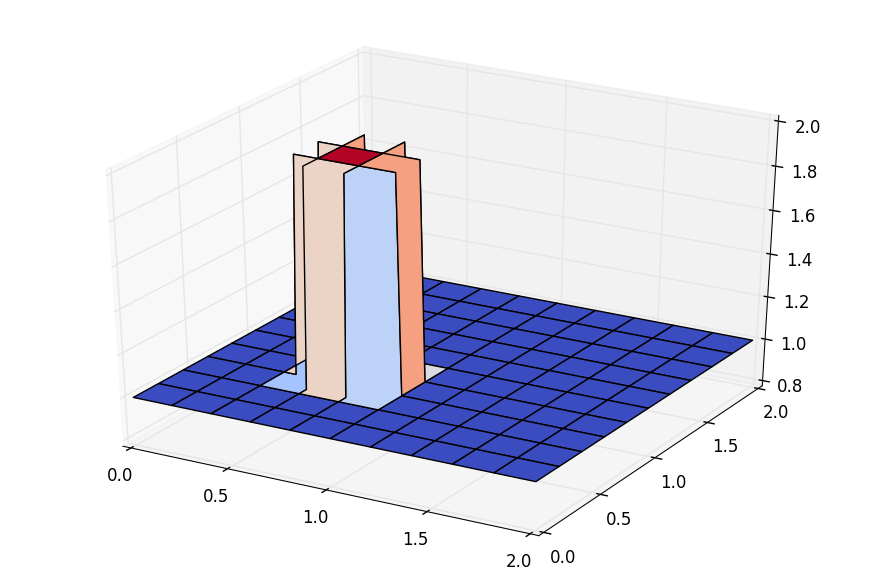

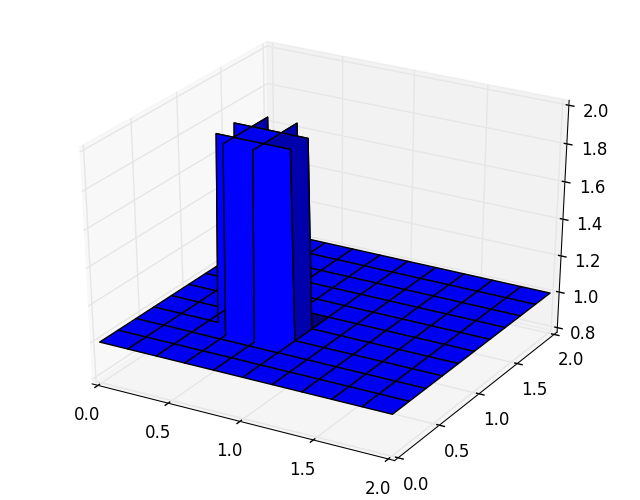

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000001077080>

In [2]:
using PyPlot

###variable declarations
nx = 101;
ny = 101;
nt = 80;
c = 1;
dx = 2/(nx-1);
dy = 2/(ny-1);
sigma = 0.2;
dt = sigma*dx;

x = linspace(0,2,nx);
y = linspace(0,2,ny);

u = ones(ny,nx) ;##create a 1xn vector of 1's
v = ones(ny,nx);
un = ones(ny,nx);
vn = ones(ny,nx);

###Assign initial conditions
s=Int(.5/dy);
e=Int(1/dy);
u[s:e,s:e]=2 ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
v[s:e,s:e]=2 ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
fig = figure(figsize=(11,7), dpi=100)          ##the figsize parameter can be used to produce different sized images
#ax = fig.gca(projection="3d")                      
ss =surf(x,y,u,cmap=ColorMap("coolwarm"))
figure()
ss2=surf(x,y,v)

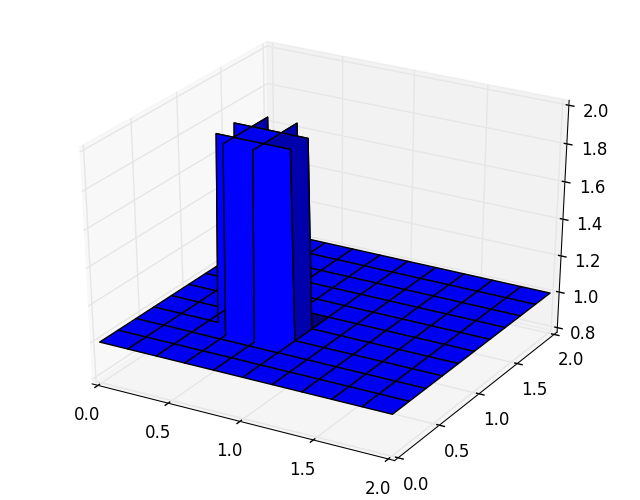

In [3]:
ss3=surf(x,y,u)

for n in 1:nt ##loop across number of time steps
    un = copy(u)
    vn = copy(v)


    u[2:end,2:end]=un[2:end,2:end]-(un[2:end,2:end].*(c*dt/dx*(un[2:end,2:end]-un[2:end,1:end-1])))-(vn[2:end,2:end].*(c*dt/dy*(un[2:end,2:end]-un[1:end-1,2:end])))
    v[2:end,2:end]=vn[2:end,2:end]-(un[2:end,2:end].*(c*dt/dx*(vn[2:end,2:end]-vn[2:end,1:end-1])))-(vn[2:end,2:end].*(c*dt/dy*(vn[2:end,2:end]-vn[1:end-1,2:end])))

    #u[2:end,2:end]=un[2:end,2:end]-(un[2:end,2:end]*c*dt/dx*(un[2:end,2:end]-un[2:end,1:end-1]))-(vn[2:end,2:end]*c*dt/dy*(un[2:end,2:end]-un[1:end-1,2:end]))
    #v[2:end,2:end]=vn[2:end,2:end]-(un[2:end,2:end]*c*dt/dx*(vn[2:end,2:end]-vn[2:end,1:end-1]))-(vn[2:end,2:end]*c*dt/dy*(vn[2:end,2:end]-vn[1:end-1,2:end]))
    
    u[1,:] = 1;
    u[end,:] = 1;
    u[:,1] = 1;
    u[:,end] = 1;
    
    v[1,:] = 1;
    v[end,:] = 1;
    v[:,1] = 1;
    v[:,end] = 1;
    #fig = figure(figsize=(11,7), dpi=100)          ##the figsize parameter can be used to produce different sized images
#ax = fig.gca(projection="3d")                      
   # ss =surf(x,y,u)
end

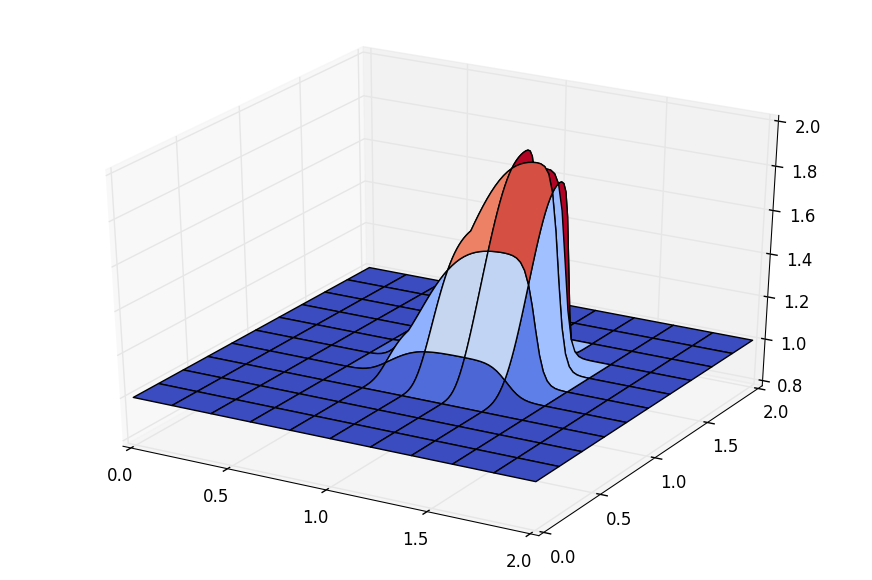

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000002884EDD8>

In [4]:
###Plot Initial Condition
fig = figure(figsize=(11,7), dpi=100)          ##the figsize parameter can be used to produce different sized images
#ax = fig.gca(projection="3d")                      
s =surf(x,y,u,cmap=ColorMap("coolwarm"))

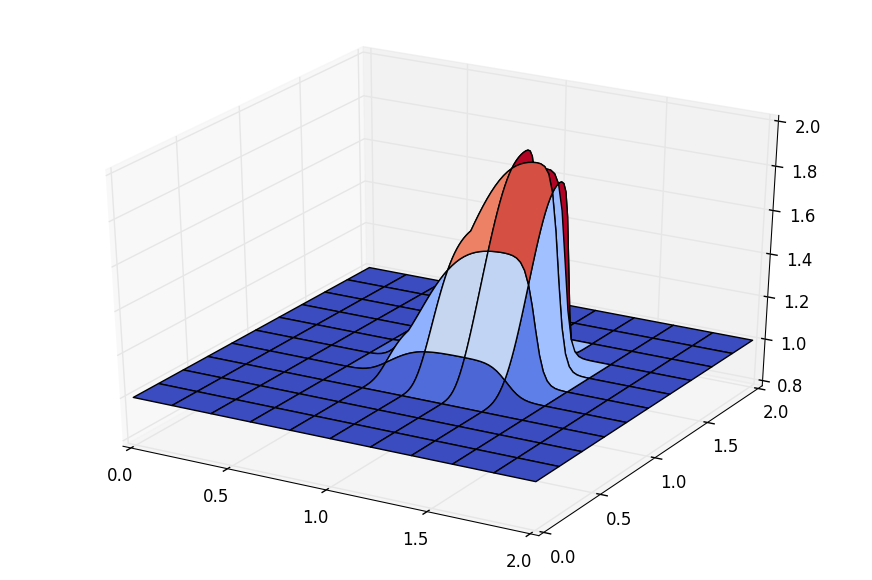

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000011725C0>

In [5]:
###Plot Initial Condition
fig = figure(figsize=(11,7), dpi=100)          ##the figsize parameter can be used to produce different sized images
#ax = fig.gca(projection="3d")   
ax=axes()
xgrid=repmat(x',nx,1)
ygrid=repmat(y,1,nx)
#ax[:plot_surface](xgrid, ygrid,v,cmap=ColorMap("gray"))
#s =surf(x,y,v,)
#s =surf(x,y,v,)
#get_cmap("bwr")
ss5=surf(xgrid,ygrid,v,cmap=ColorMap("coolwarm"))

In [6]:
set_cmap("spring")

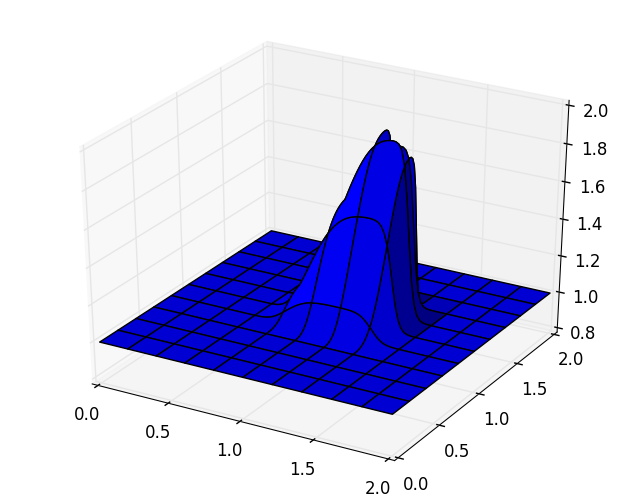

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000001188748>

In [7]:
figure()
ss5=surf(xgrid,ygrid,u)